In [172]:
%matplotlib notebook


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import date

In [223]:
dados_treinamento = pd.read_csv('dados_treinamento.csv')

In [224]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [250]:
dados_treinamento['delivery_date'] = pd.to_datetime(dados_treinamento['order_delivered_customer_date'])
dados_treinamento['aproved_date'] = pd.to_datetime(dados_treinamento['order_aproved_at'])
dados_treinamento['delta time'] = dados_treinamento['delivery_date'] - dados_treinamento['aproved_date']
dados_treinamento['delta days'] = dados_treinamento['delta time'].dt.days


In [206]:
df = dados_treinamento[['order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty', 'review_score', 'review_comment_message', 'delta_delivery_time']]

In [38]:
y = df['review_score']
x = df[['order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty']]

In [39]:
results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     102.8
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           2.03e-87
Time:                        14:01:29   Log-Likelihood:            -1.0357e+05
No. Observations:               60000   AIC:                         2.071e+05
Df Residuals:                   59995   BIC:                         2.072e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.1071      0.012    339.063      0.000       4.083       4.131
order_products_value           0.0001   3.38e-05      3.394      0.001    4.84e-05       0.000
order_freight_value           -0.0056      0.000    -18.849      0.000      -0.006      -0.005
product_description_lenght  3.553e-05   8.61e-06      4.126      0.000    1.87e-05    5.24e-05
product_photos_qty             0.0114      0.003      3.575      0.000       0.005       0.018
==============================================================================
Omnibus:                    10443.513   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16942.443
Skew:                          -1.291   Prob(JB):                         0.00
Kurtosis:                       3.337   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
c = results.params["const"]
b0 = results.params["order_products_value"]
b1 = results.params["order_freight_value"]
b2 = results.params["product_description_lenght"]
b3 = results.params["product_photos_qty"]

In [113]:
df.head()

,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta_delivery_time
4203,72.90,13.85,458,1,1,produto com defeito furado desejo devolução do...,"[0, -1, -9]"
26732,93.00,16.41,364,2,1,meu tapete ainda não foi entregue,"[0, 0, 1]"
9872,20.90,31.05,618,2,1,nao chegou ainda,"[1, 0, -2]"
5378,477.00,41.61,404,3,1,NaN,"[1, 6, -3]"
9986,119.99,18.09,798,1,1,gostei esperava que fosse melhor,"[1, -2, -7]"


<IPython.core.display.Javascript object>


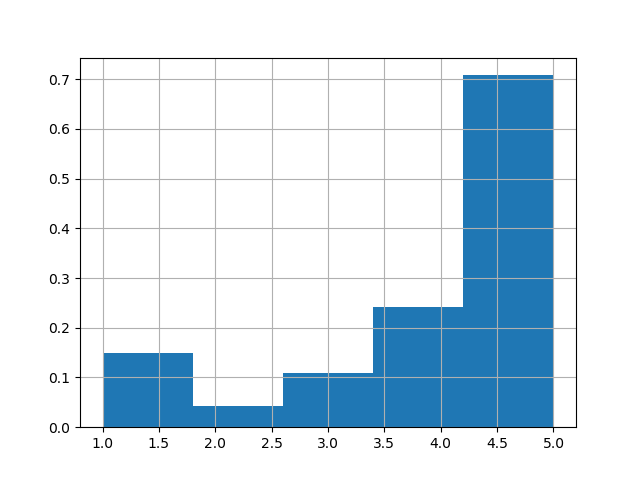

In [33]:
df['review_score'].hist(bins=5, density=True);

In [ ]:
def f(price, frete, description, photos):
    return int(c + b0*price + b1*frete + b2*description + b3*photos)